# Week 6 Excercises
Joshua Burden  
DSC530 Week 6  
Bellevue University  
Catherine Williams  
07/17/2022

Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

### Page 89: 7-1 (Using data from the NSFG, make a scatter plot of birth weight versus mother’s age…)
Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

In [4]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/brfss.py")


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

Downloaded brfss.py


In [25]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot

import pandas as pd

In [26]:
import first
live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])
live.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


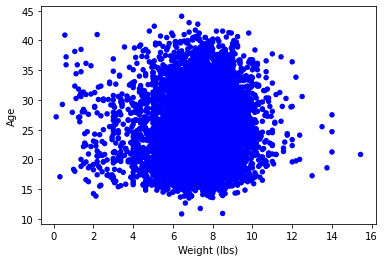

In [27]:
# Initial Scatter plot
age = live.agepreg
weight = live.totalwgt_lb

thinkplot.Scatter(weight, age, alpha = 1.0)
thinkplot.Config(xlabel = "Weight (lbs)",
                 ylabel = "Age",
                 legend = False)

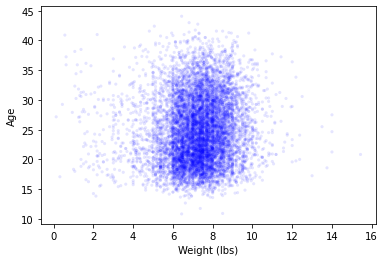

In [28]:
# Scatter plot with alpha changed to visualize it a bit better
thinkplot.Scatter(weight, age, alpha = 0.1, s = 10)
thinkplot.Config(xlabel = "Weight (lbs)",
                 ylabel = "Age",
                 legend = False)

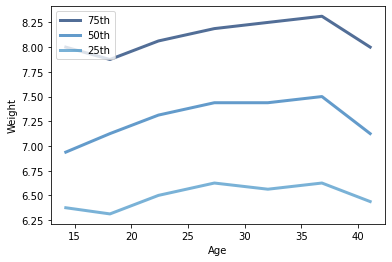

In [29]:
# Plot percentile of birth weight vs mother's age
bins = np.arange(10, 50, 5)
indices = np.digitize(age, bins)
groups = live.groupby(indices)


mean_ages = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

for percent in [75, 50, 25]:
    weight_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
    label = "%dth" % percent
    thinkplot.Plot(mean_ages, weight_percentiles, label = label)
    
thinkplot.Config(xlabel = "Age",
                 ylabel = "Weight",
                 legend = True)

### Page 99: 8-1 (In this chapter we used sample mean to estimate • and found that the sample mean yields lower MSE…)
In this chapter we used 
 and median to estimate µ, and found that 
 yields lower MSE. Also, we used 
 and 
 to estimate σ, and found that 
 is biased and 
 unbiased. Run similar experiments to see if 
 and median are biased estimates of µ. Also check whether 
 or 
 yields a lower MSE.

In [37]:
import random

def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)


def firstEstimate(n = 7, iters = 30_000):
    """
    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for i in range(iters):
        xs = [random.gauss(mu, sigma) for j in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print(f"Mean Error xbar: {MeanError(means, mu)}")
    print(f"Mean Error Median: {MeanError(medians, mu)}")
    
    
firstEstimate()
print()
firstEstimate(7, 100_000)
print('As the number of iterations increases, the mean error xbar and median get closer to 0.')

Experiment 1
Mean Error xbar: 0.0005878368609678345
Mean Error Median: 0.0005822532716722748

Experiment 1
Mean Error xbar: -0.0021547735252927594
Mean Error Median: -0.002931171609528034
As the number of iterations increases, the mean error xbar and median get closer to 0.


In [38]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

def secondEstimate(n = 7, iters = 30_000):
    """
    RMSE for biased and unbiased
    n: sample size
    iters: number of iterations
    """
    
    mu = 0
    sigma = 1
    
    estimates1 = []
    estimates2 = []
    for i in range(iters):
        xs = [random.gauss(mu, sigma) for j in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof = 1)
        estimates1.append(biased)
        estimates2.append(unbiased)
        
    print("Experiment 2")
    print(f"RMSE biased: {RMSE(estimates1, sigma**2)}")
    print(f"RMSE unbiased: {RMSE(estimates2, sigma**2)}")
    
secondEstimate()
print()
secondEstimate(7, 100_000)
print('The biased RMSE produces a lower RMSE than the unbiased estimator.')

Experiment 2
RMSE biased: 0.5136927470610182
RMSE unbiased: 0.5781506669328523

Experiment 2
RMSE biased: 0.5156584269423298
RMSE unbiased: 0.5784304262359353
The biased RMSE produces a lower RMSE than the unbiased estimator.


### Page 99: 8-2 (Suppose that you draw a sample size with n = 10 from an exponential distribution with • = 2…)
Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of n and make a plot of standard error versus n.

Standard Error: 0.801217888297599
Confidence interval: (1.2320521750591846, 3.6628464955264994)

Standard Error: 0.2895656107370848
Confidence interval: (1.6075534114892942, 2.523462070204423)
hen the sample size is equal to 10, the Standard Error is .737 and the confidence interval is from 1.266 to 3.432. When the sample size increases (n = 50), the Standard Error becomes smaller and the confidence interval shrinks.


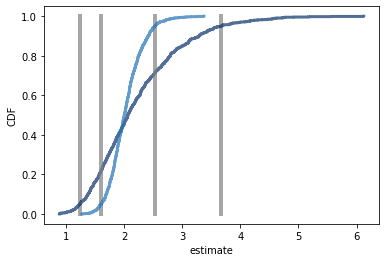

In [39]:
def verticalLine(x, y = 1):
    thinkplot.Plot([x, x], [0, y], color = "0.5", linewidth = 4)

def sampleExperiment(lam = 2, n = 10, iters = 1_000):
    """
    lam: parameter of an exponetial distribution
    n: sample size
    iters: number of iterations
    """
    
    estimates = []
    for i in range(iters):
        xs = np.random.exponential(1 / lam, n)
        lamhat = 1 / np.mean(xs)
        estimates.append(lamhat)
        
    stderr = RMSE(estimates, lam)
    print(f"Standard Error: {stderr}")
    
    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print(f"Confidence interval: {ci}")
    
    verticalLine(ci[0])
    verticalLine(ci[1])
    
    thinkplot.Cdf(cdf)
    thinkplot.config(xlabel = "estimate",
                     ylabel = "CDF")
    
    return stderr

sampleExperiment()
print()
sampleExperiment(2, 50, 1_000)
print('hen the sample size is equal to 10, the Standard Error is .737 and the confidence interval is from 1.266 to 3.432. When the sample size increases (n = 50), the Standard Error becomes smaller and the confidence interval shrinks.')